In [1]:
%run ~/.python/init.ipynb

In [2]:
import time
import copy
import PIL
from torchvision.utils import make_grid
import torch

In [3]:
def read_gif(filename):
    """ readGif(filename, asNumpy=True)
    
    Read images from an animated GIF file.  Returns a list of numpy 
    arrays, or, if asNumpy is false, a list if PIL images.
    
    """
    # Load file using PIL
    pilIm = PIL.Image.open(filename)    
    pilIm.seek(0)
    
    # Read all images inside
    images = []
    try:
        while True:
            # Get image as numpy array
            tmp = pilIm.convert() # Make without palette
            a = np.asarray(tmp)
            if len(a.shape)==0:
                raise MemoryError("Too little memory to convert PIL image to array")
            # Store, and next
            images.append(a)
            pilIm.seek(pilIm.tell()+1)
    except EOFError:
        pass
    
    # Done
    return images 

def read_sample(path):
    img_batch = np.moveaxis(np.load(path), 1,3).astype(np.uint8)
    return img_batch

In [4]:
def read_scatter(path):
    img = PIL.Image.open(path)
    tmp = img.convert() # Make without palette
    a = np.asarray(tmp)
    return a

In [5]:
from skimage.transform import resize as _resize
resize = lambda x: (_resize(x, (450, 450), order=0) * 255).astype(np.uint8)
# resize_smaller = lambda x: (_resize(x, (128, int(128*1.3333))) * 255).astype(np.uint8)

In [6]:
def make_frames(sample_path):
    frames = read_sample(sample_path)
    scatter_path = Path((sample_path
#      .replace("carla_80_autoreg", 'carla_80_autoreg_predictions')
     .replace("carla_80_hierarchy-2", 'carla_80_hierarchy-2_predictions')
     .replace('.npy','_scatter')
    ))
    scatter = [read_scatter(scatter_path / f"{i}.jpg") for i in range(len(frames))]
    frames = [np.hstack([resize(left), right]) for left, right in zip(frames, scatter)]
    return frames



def make_gif_from_frames(frames, out_gif_path):
    # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
    imgs = (PIL.Image.fromarray(f) for f in frames)
    img = next(imgs)  # extract first image from iterator
    img.save(fp=out_gif_path, 
             format='GIF', 
             append_images=imgs,
             save_all=True, 
             duration=50, 
             loop=0)

In [7]:
# !mkdir /ubc/cs/research/fwood/vadmas/dev/projects/active/driving-models/driving-models/gifs/carla_80_hierarchy-2_no_interp_with_lights/
# !mkdir /ubc/cs/research/fwood/vadmas/dev/projects/active/driving-models/driving-models/gifs/carla_80_autoreg_no_interp_with_lights/

In [8]:
def make_gif(sample_path):
    print(f'making frames for {sample_path}...')
    frames = make_frames(sample_path)
    out_gif_path = str(sample_path).replace(".npy","_with_map.gif")
#     out_gif_path = out_gif_path.replace("/ubc/cs/research/plai-scratch/video-diffusion-shared/long-videos/carla_80_autoreg/",
#                          "/ubc/cs/research/fwood/vadmas/dev/projects/active/driving-models/driving-models/gifs/carla_80_autoreg_no_interp_with_lights/")
    out_gif_path = out_gif_path.replace("/ubc/cs/research/plai-scratch/video-diffusion-shared/long-videos/carla_80_hierarchy-2/",
                         "/ubc/cs/research/fwood/vadmas/dev/projects/active/driving-models/driving-models/gifs/carla_80_hierarchy-2_no_interp_with_lights/")
    print(f'making gif for {out_gif_path}...')
    make_gif_from_frames(frames, out_gif_path)

In [9]:
from parallel import pmap

In [10]:
# root = "/ubc/cs/research/plai-scratch/video-diffusion-shared/long-videos/carla_80_autoreg/"
root = "/ubc/cs/research/plai-scratch/video-diffusion-shared/long-videos/carla_80_hierarchy-2/"
paths = [str(Path(root) / f"video_{i}.npy") for i in range(91)]
pmap(make_gif, paths)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [24]:
paths[0]

'/ubc/cs/research/plai-scratch/video-diffusion-shared/long-videos/carla_80_autoreg/video_0.npy'

In [10]:
frames = make_frames(paths[10])

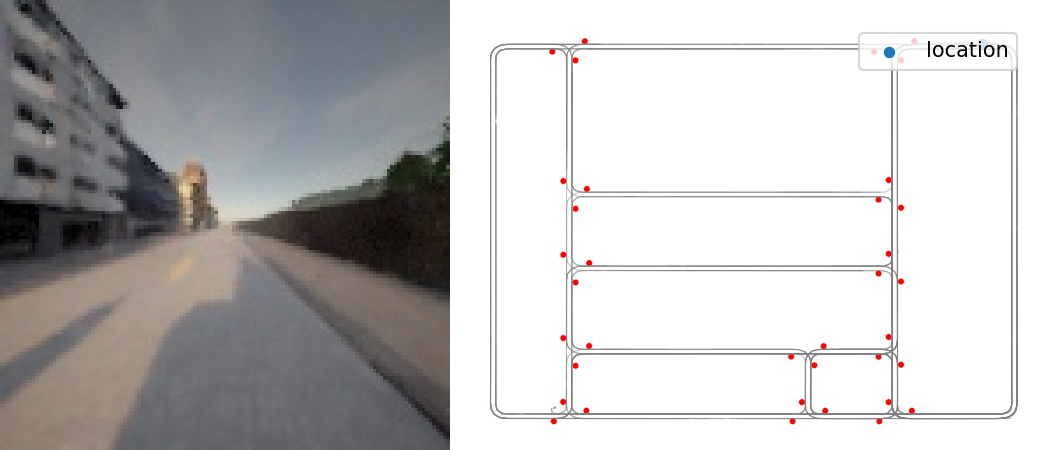

In [11]:
PIL.Image.fromarray(frames[100])

In [20]:
from parallel import pmap